In [ ]:
# Importing necessary libraries

In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import sklearn

In [ ]:
# Loading the dataset from a CSV file (without the index column)

In [10]:
df = pd.read_csv('Classified Data.csv',index_col=0)

In [ ]:
# Displaying the first few rows of the dataset

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
# Importing StandardScaler to normalize the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler() # Creating an instance of the scaler

In [ ]:
# Fitting the scaler on the feature columns (excluding the target class)

In [15]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [ ]:
# Transforming the feature columns using the fitted scaler

In [16]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
# Creating a DataFrame with the scaled features

In [17]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head() # Displaying the first few rows of the scaled data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [ ]:
# Splitting the data into training and test sets (70% train, 30% test)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [ ]:
# Importing the KNeighborsClassifier model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initializing the KNN model with k=1 (1 nearest neighbor)

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Fitting the model on the training data

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Making predictions on the test data

In [23]:
pred = knn.predict(x_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Evaluating the model using confusion matrix and classification report

In [25]:
print(confusion_matrix(y_test,pred))

[[144  12]
 [ 12 132]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       156
           1       0.92      0.92      0.92       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
# Elbow method to determine the optimal value of K

In [27]:
error_rate = []  # List to store error rates for different values of K

In [ ]:
# Looping through values of K from 1 to 39

In [29]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
# Plotting the error rate vs. K value to find the optimal K

Text(0, 0.5, 'Error Rate')

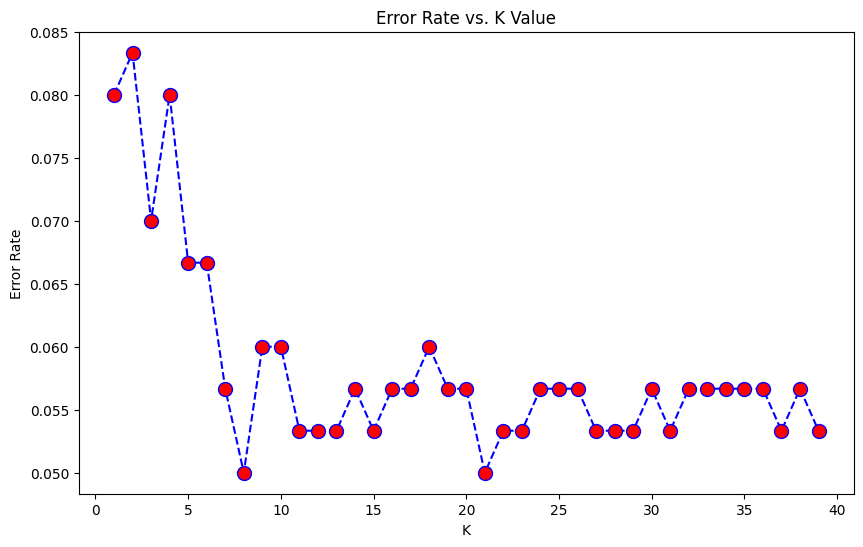

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Training the KNN model with the optimal K value (e.g., K=17 based on the elbow plot)

In [35]:
knn_2 = KNeighborsClassifier(n_neighbors=17)

In [40]:
knn_2.fit(x_train,y_train)
pred_2 = knn_2.predict(x_test)

In [ ]:
# Evaluating the optimized model's performance

In [41]:
print(confusion_matrix(y_test,pred_2))

[[146  10]
 [  7 137]]


In [42]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       156
           1       0.93      0.95      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

